In [1]:
%load_ext rpy2.ipython




Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [2]:
%%R

#########################################################
#  Economic forecasting and analysis
#  Perry Sadorsky
#  connectedness between fintech  and banking
#  first build may 2023 
#  revised February 2024
##########################################################

## clear memory
rm(list=ls()) 

# load packages
library(fpp2)
library(quantmod)
library(pastecs)
library(corrplot)
#library(igraph)
library(ConnectednessApproach)
library(riskParityPortfolio)
library(quadprog)
library(PerformanceAnalytics)
library(vars)
library(readxl)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
-- Attaching packages ---------------------------------------------- fpp2 2.5 --
v ggplot2   4.0.0      v fma       2.5   
v forecast  8.24.0     v expsmooth 2.3   

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR

Attaching package: 'pastecs'

The following objects are masked from 'package:xts':

    first, last

corrplot 0.95 loaded

Please cite as: 

 Gabauer, David (2022). ConnectednessApproach.
 R package version 1.0.0. https://CRAN.R-project.org/package=ConnectednessApproach 


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend

Loading required package: MASS

Attaching package: 'MASS'

The following objects are masked from 'package:fma':

    cement, housing, petrol

Loadi

[1] "Found sheets: Traditionals, NeoBanks, Challengers"
[1] "Final Dataset Dimensions:"
[1] 2159    3
List of 11
 $ TABLE    : chr [1:7, 1:4] "61.41" "18.17" "20.08" " 38.25" ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Traditionals" "NeoBanks" "Challengers" "TO" ...
  .. ..$ : chr [1:4] "Traditionals" "NeoBanks" "Challengers" "FROM"
 $ CT       : num [1:3, 1:3, 1:2158] 0.582 0.191 0.21 0.198 0.571 ...
  ..- attr(*, "dimnames")=List of 3
  .. ..$ : chr [1:3] "Traditionals" "NeoBanks" "Challengers"
  .. ..$ : chr [1:3] "Traditionals" "NeoBanks" "Challengers"
  .. ..$ : chr [1:2158] "2017-01-03" "2017-01-04" "2017-01-05" "2017-01-06" ...
 $ TCI      : num [1:2158, 1] 43.5 42.7 43.6 44.9 46.3 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2158] "2017-01-03" "2017-01-04" "2017-01-05" "2017-01-06" ...
  .. ..$ : chr "TCI"
 $ TO       : num [1:2158, 1:3] 40.1 39.2 46.3 51.2 56.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2158] "2017-01-03" "2017-01-

Estimating model
Computing connectedness measures
The (generalized) VAR connectedness approach is implemented according to:
 Diebold, F. X., & Yilmaz, K. (2012). Better to give than to receive: Predictive directional measurement of volatility spillovers. International Journal of Forecasting.
Estimating model
Computing connectedness measures
The TVP-VAR connectedness approach is implemented according to:
 Antonakakis, N., Chatziantoniou, I., & Gabauer, D. (2020). Refined measures of dynamic connectedness based on time-varying parameter vector autoregressions. Journal of Risk and Financial Management.
In addition: Warning messages:
1: In Return.portfolio.geometric(R = R, weights = weights, wealth.index = wealth.index,  :
  The weights for one or more periods do not sum up to 1: assuming a return of 0 for the residual weights
2: In Return.portfolio.geometric(R = R, weights = weights, wealth.index = wealth.index,  :
  The weights for one or more periods do not sum up to 1: assuming a retur

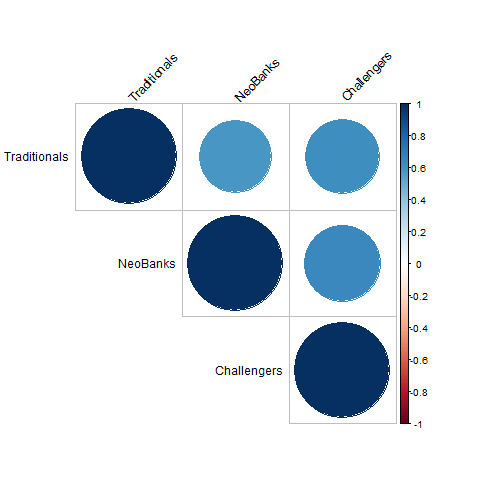

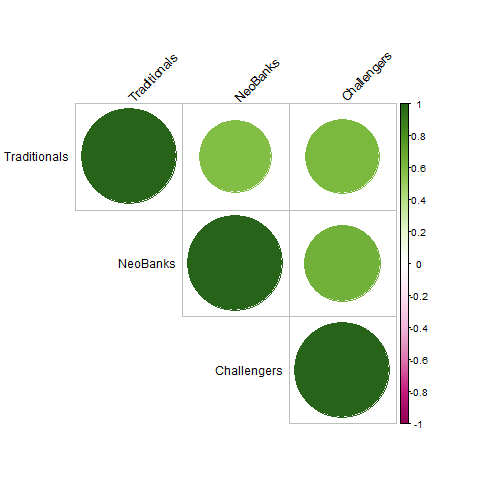

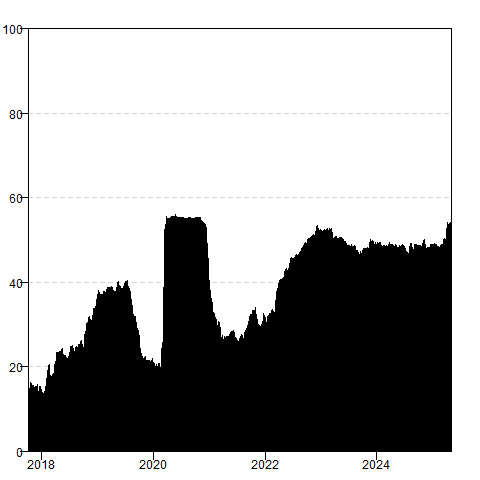

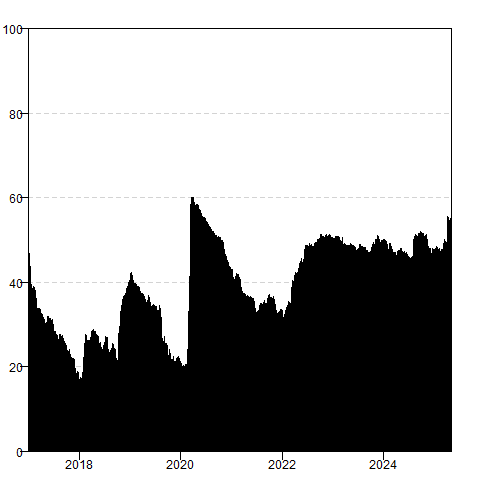

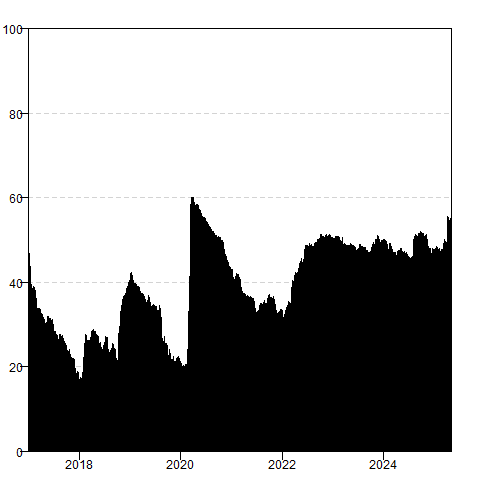

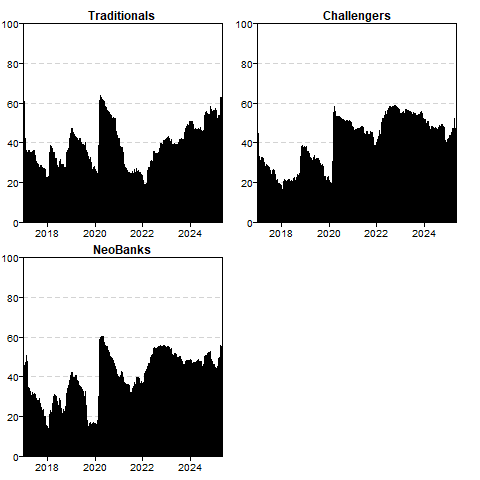

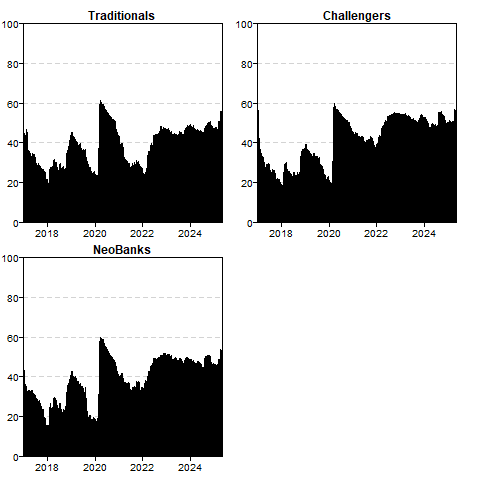

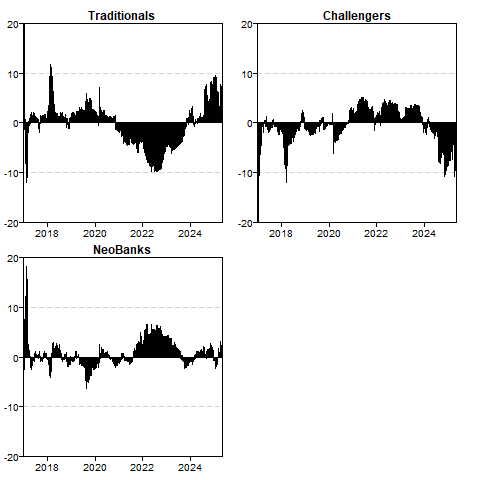

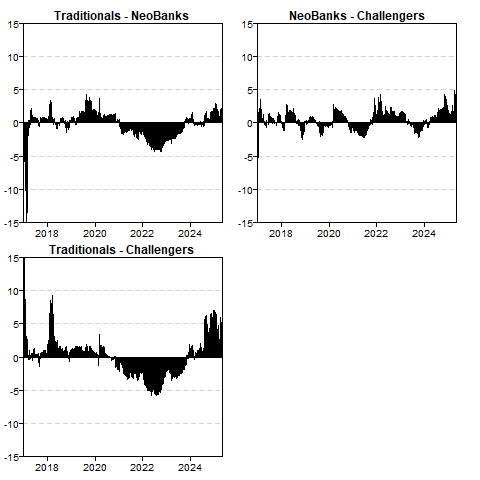

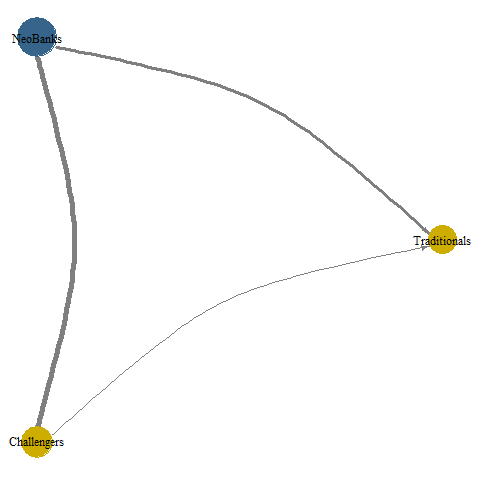

In [3]:
%%R

# set working directory
# setwd("C:/finx_1")

#load data
# load("my_data_1.RData")
# load("my_data_2.RData")

excel_file <- "calculated_indices_EQUAL.xlsx"

# 1. Get the names of all sheets in the Excel file
sheet_names <- excel_sheets(excel_file)
print(paste("Found sheets:", paste(sheet_names, collapse=", ")))

# 2. Function to read one sheet and rename columns
read_one_sheet <- function(sheet_name) {
  # Read the sheet
  df <- read_excel(excel_file, sheet = sheet_name)
  
  # Ensure the first column is treated as Date
  colnames(df)[1] <- "Date"
  
  # Rename the second column (the value) to the Sheet Name 
  # (so we distinguish Asset A from Asset B)
  colnames(df)[2] <- sheet_name
  
  # Return just the first 2 columns to be safe
  return(df[, 1:2])
}

# 3. Read all sheets into a list of dataframes
list_of_dfs <- lapply(sheet_names, read_one_sheet)

# 4. Merge all dataframes together by "Date"
# This combines Sheet 1, Sheet 2, and Sheet 3 into one table
raw_df <- Reduce(function(x, y) merge(x, y, by = "Date", all = TRUE), list_of_dfs)

# 5. Convert to 'xts' object
# Column 1 is Date, Columns 2 to End are the Assets
y <- xts(as.matrix(raw_df[,-1]), order.by = as.Date(raw_df[[1]]))

# --- DATA CHECK ---
print("Final Dataset Dimensions:")
print(dim(y)) # Should show Row Count x 3 Columns
head(y)
# ------------------

#  data
head(y)
tail(y)


# plots
p1 <-plot.xts(y, auto.legend = TRUE, main="",legend.loc = "topleft")
# p2 <-plot.xts(y[,5], auto.legend = TRUE, main="",legend.loc = "topleft", col=c("goldenrod"))


# png("plots/etfsplot1.png",  width = 600, height = 480 , pointsize=14)
#par(mfrow = c(2, 1))
p1
#p2
#par(mfrow = c(1, 1))
# dev.off()


# calculate returns
y.r <- na.omit (1*diff(log(y)))
head(y.r)
tail(y.r)
summary(y.r)

# summary statistics
sumstats = stat.desc(100*y.r, basic=F, norm=TRUE)
ss_o = format(round(sumstats, 4), nsmall = 4)
ss_o
summary(y.r)

# --- FIX: Removed hardcoded dates that might not exist in your file ---
# summary(y.r["2020-03-01/2021-03-01"] ) 
# summary (window(y.r, start="2020-03-01", end = "2021-03-01" ))

# write.csv(ss_o, "sumstats.csv")
# write.csv(noquote(t(ss_o)), "sumstats.csv")

# correlations
cor(y.r)
# write.csv(cor(y.r), "correlations.csv")

# png("plots/corrplot1.png",  width = 580, height = 550)
corrplot(cor(y.r), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)
# dev.off()

## COL2: Get diverging colors
# c('RdBu', 'BrBG', 'PiYG', 'PRGn', 'PuOr', 'RdYlBu')
corrplot(cor(y.r), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45, col=COL2("PiYG"))

##########################################################
# connectedness approach
# https://gabauerdavid.github.io/ConnectednessApproach/Rpackage
##########################################################

# lag length selection
vars::VARselect(y.r)

# standard dy approach
dca = ConnectednessApproach(y.r,
                            nlag=1,
                            nfore=20,
                            window.size=200)

(dca$TABLE)
PlotTCI(dca, ylim=c(0,100))

# tvp-var
dca = ConnectednessApproach(y.r,
                            nlag=1,
                            nfore=20,
                            #window.size=200,
                            corrected = FALSE,
                            model="TVP-VAR")

(dca$TABLE)
PlotTCI(dca, ylim=c(0,100))

# tvp -var
#dca = ConnectednessApproach(y.r,
#                            nlag=1,
#                            nfore=20,
#                            model="TVP-VAR",
#                            connectedness="Time",
#                            corrected=TRUE,
#                            VAR_config=list(TVPVAR=list(kappa1=0.99, kappa2=0.99,
#                                                        prior="MinnesotaPrior", gamma=0.1)))
str(dca)

(dca$TABLE)
# write.csv(noquote(dca$TABLE), "connect_table.csv")


gfevd = dca$CT
dim(gfevd)
(ConnectednessTable(gfevd))
(ConnectednessTable(gfevd)$PCI)
# write.csv(ConnectednessTable(gfevd)$PCI, "connect_table_pw.csv")


# png("plots/plot_tci.png",  width = 600, height = 480 , pointsize=14)
PlotTCI(dca, ylim=c(0,100))
# dev.off()
# View (dca$TCI) # View doesn't work well in Jupyter/Notebooks
max(dca$TCI)
min(dca$TCI)
mean(dca$TCI)


# png("plots/plot_to.png",  width = 600, height = 480 , pointsize=14)
PlotTO(dca, ylim=c(0,100))
# dev.off()

# png("plots/plot_from.png",  width = 600, height = 480 , pointsize=14)
PlotFROM(dca, ylim=c(0,100))
# dev.off()

# png("plots/plot_net.png",  width = 600, height = 480 , pointsize=14)
PlotNET(dca, ylim=c(-20,20))
# dev.off()

# png("plots/plot_npdc.png",  width = 600, height = 480 , pointsize=14)
PlotNPDC(dca, ylim=c(-15,15))
# dev.off()

# png("plots/plot_network.png",  width = 600, height = 480 , pointsize=14)
PlotNetwork(dca)
# dev.off()

# portfolio weights
mcp = MinimumConnectednessPortfolio(as.zoo(y.r), dca$PCI, statistics="Fisher")
mcp$TABLE
w.mcp <- mcp$portfolio_weights 
apply(w.mcp,2, mean)

rpp = RiskParityPortfolio(as.zoo(y.r), dca$PCI, statistics="Fisher")
rpp$TABLE
w.rpp <- rpp$portfolio_weights 
apply(w.rpp,2, mean)

head(w.rpp)
tail(w.rpp)
dim(w.rpp)
dim(y.r)
dim(w.mcp)

head (w.rpp*y.r)
# w.rpp[1,1] *y.r[1,1]

w.mcp_temp <-  cbind(y.r[,1], w.mcp)
head(w.mcp_temp)
w.mcp_temp <- w.mcp_temp[,-1]
head(w.mcp_temp)

w.rpp_temp <-  cbind(y.r[,1], w.rpp)
head(w.rpp_temp)
w.rpp_temp <- w.rpp_temp[,-1]
head(w.rpp_temp)


################################################################
# portfolios
################################################################

# choice of portfolios; mcp, rpp, ew, rp
# https://cran.r-project.org/web/packages/riskParityPortfolio/vignettes/RiskParityPortfolio.html#a-pratical-example-using-faang-price-data
# for backtesting
# https://cran.r-project.org/web/packages/portfolioBacktest/vignettes/PortfolioBacktest.html#defining-portfolios

y.r_c <- exp(y.r)-1

w.eq <- rep(1/ncol(y), ncol(y) )
w.rp <- riskParityPortfolio(cov(y.r_c))$w

# https://bookdown.org/compfinezbook/introcompfinr/Efficient-portfolios-of.html
max_sharpe_ratio <- function(dataset) {
  # prices <- dataset$adjusted
  prices <- dataset
  
  log_returns <- diff(log(prices))[-1]
  log_returns <- exp(log_returns)-1
  N <- ncol(prices)

  Sigma <- cov(log_returns)
  mu <- colMeans(log_returns)
  if (all(mu <= 1e-8))
    return(rep(0, N))
  Dmat <- 2 * Sigma
  Amat <- diag(N)
  Amat <- cbind(mu, Amat)
  bvec <- c(1, rep(0, N))
  dvec <- rep(0, N)
  res <- solve.QP(Dmat = Dmat, dvec = dvec, Amat = Amat, bvec = bvec, meq = 1)
  w <- res$solution
  return(w/sum(w))
}


# rolling portfolio weights
wl <- 252
roll_rp =  na.omit (rollapply(y.r_c, wl ,function(x) riskParityPortfolio(cov(x))$w, by.column=FALSE,align="right"))
head(roll_rp)
tail(roll_rp)

roll_ms =  na.omit (rollapply(y, wl ,function(x) max_sharpe_ratio(x), by.column=FALSE,align="right"))
colnames(roll_ms) <- colnames(roll_rp)
head(roll_ms)
tail(roll_ms)


###########################3

# port_eqw  <- Return.portfolio(y.r, weights=w.eq ,   verbose=TRUE, geometric = FALSE)
port_eqw  <- Return.portfolio( y.r_c,   verbose=TRUE,  rebalance_on = "days")
head (port_eqw$BOP.Weight,22)
head (port_eqw$EOP.Weight,22)

# port_rp   <- Return.portfolio(y.r, weights=w.rp,verbose=TRUE)
port_rp   <- Return.portfolio( y.r_c, weights=roll_rp,   verbose=TRUE)
port_mcp  <- Return.portfolio( y.r_c, weights=w.mcp_temp,verbose=TRUE)
port_rpp  <- Return.portfolio( y.r_c, weights=w.rpp_temp,verbose=TRUE)
port_ms   <- Return.portfolio( y.r_c, weights=roll_ms,   verbose=TRUE)


str(port_eqw)

################################################################
# some checks on the eqw
head(port_eqw$returns)
w.eq *y.r[1:5,]
apply(w.eq *y.r[1:5,],1, sum)
head(port_rp$returns)
tail(port_rp$returns)

# --- FIX: Removed hardcoded date filter that crashes if data is different ---
# table.AnnualizedReturns(apply(w.eq *y.r_c["2017-09-14/"],1,sum), scale=252, Rf=(.01/252))
table.AnnualizedReturns(apply(w.eq *y.r_c,1,sum), scale=252, Rf=(.01/252))

# in sample eqw
# summary(y.r_c["2017-09-14/"])
# w.eq *apply(y.r_c["2017-09-14/"], 2, mean)
# sum(w.eq *apply(y.r_c["2017-09-14/"], 2, mean))*252
# 0.06297518
################################################################


port_ret <- cbind(port_eqw$returns, port_rp$returns, port_rpp$returns, port_ms$returns )
colnames(port_ret) <- c("EQW", "RP", "RPC", "MS")
# all portfolios start at same time period
port_ret <- na.omit( port_ret)
head(port_ret)


# portfolio summary statistics
# starting date
# --- FIX: Removed hardcoded date filtering to allow dynamic data ---
aw1 <- apply(roll_rp, 2, mean)
aw2 <- apply(roll_ms, 2, mean)
aw3 <- apply(w.rpp_temp, 2, mean)

summary(roll_rp)
summary(roll_ms)
summary(w.rpp_temp)

# --- FIX: This line caused the "subscript out of bounds" error ---
# It was trying to access columns 2 through 6. Your data likely has 3 cols.
# summary(roll_rp["2017-09-14/"])[1,2:6]
summary(roll_rp)[1,] # Fixed version

plot(roll_rp,                   main="weights RP", auto.legend = TRUE, legend.loc = "topleft")
plot(roll_ms,                   main="weights MS", auto.legend = TRUE, legend.loc = "topleft")
# plot(w.rpp_temp["2017-09-14/"], main="weights RPC", auto.legend = TRUE, legend.loc = "topleft") # Removed date
plot(w.rpp_temp, main="weights RPC", auto.legend = TRUE, legend.loc = "topleft")


# --- FIX: Removed hardcoded date filters here as well ---
aw1_2 <- rbind (apply(roll_rp, 2, mean),
                apply(roll_rp, 2, sd),
                apply(roll_rp, 2, sd) / apply(roll_rp, 2, mean),
                apply(roll_rp, 2, min), 
                apply(roll_rp, 2, max) )

aw2_2 <- rbind (apply(roll_ms, 2, mean),
                apply(roll_ms, 2, sd),
                apply(roll_ms, 2, sd) / apply(roll_ms, 2, mean),
                apply(roll_ms, 2, min), 
                apply(roll_ms, 2, max) )

aw3_2 <- rbind (apply(w.rpp_temp, 2, mean),
                apply(w.rpp_temp, 2, sd),
                apply(w.rpp_temp, 2, sd) / apply(w.rpp_temp, 2, mean),
                apply(w.rpp_temp, 2, min), 
                apply(w.rpp_temp, 2, max) )


# write.csv( rbind( rep(0.2,5), rep(0,5), rep(0,5), rep(0.2,5), rep(0.2,5)  , aw1_2, aw2_2, aw3_2), "tables_port_ave_weight.csv")


# png("plots/equity_curve.png",  width = 580, height = 380 )
# png("plots/equity_curve.png",  width = 600, height = 480 , pointsize=14)
chart.CumReturns(port_ret,  main = "Equity curves", ylab="", geometric = TRUE, wealth.index = TRUE, 
                  legend.loc = "topleft", )
# dev.off()

# experimenting with colors
#chart.CumReturns(port_ret,  main = "Equity curves", ylab="", geometric = FALSE, wealth.index = TRUE, 
#                 colorset=tim6equal, legend.loc = "topleft", )

#chart.CumReturns(port_ret,  main = "Equity curves", ylab="", geometric = FALSE, wealth.index = TRUE, 
#                 colorset=rich6equal, legend.loc = "topleft", )

# set risk free rate ; from yahoo finance ^IRX
(rfr <- (0.9556624/100)/252)

ta1 <- table.AnnualizedReturns(port_ret, scale=252, geometric = TRUE,  Rf=rfr)

ta2 <- table.DownsideRisk(port_ret, scale=252,  Rf=rfr, MAR =.00, p=.95)
ta3 <- Omega(port_ret, Rf=rfr)
SortinoRatio(port_ret)

rbind(ta1, ta2, ta3)
# write.csv(rbind(ta1, ta2, ta3), "tables_port.csv")
# write.csv(rbind(ta1, ta2, ta3), "tables_port_rb_daily_10.csv")
# write.csv(rbind(ta1, ta2, ta3), "tables_port_rb_daily_20.csv")
# write.csv(rbind(ta1, ta2, ta3), "tables_port_rb_daily_30.csv")
# write.csv(rbind(ta1, ta2, ta3), "tables_port_rb_daily_50.csv")



#################################################################
# weekly re-balancing
#################################################################

rbp <- c("days")
# rbp <- c("weeks")
# rbp <- c("months")


port_eqw  <- Return.portfolio( y.r_c,   verbose=TRUE,  rebalance_on = rbp)
head (port_eqw$BOP.Weight,22)
head (port_eqw$EOP.Weight,22)
tail (port_eqw$BOP.Weight,22)
tail (port_eqw$EOP.Weight,22)



# port_rp   <- Return.portfolio(y.r, weights=w.rp,verbose=TRUE)
ep <- endpoints(roll_rp, on = rbp)
port_rp   <- Return.portfolio( y.r_c, weights= roll_rp[ep,] ,   verbose=TRUE)
head(roll_rp[ep,],22)
head (port_rp$BOP.Weight,22)
head (port_rp$EOP.Weight,22)
tail(roll_rp[ep,],22)
tail (port_rp$BOP.Weight,22)
tail (port_rp$EOP.Weight,22)


ep <- endpoints(w.mcp_temp, on = rbp)
port_mcp  <- Return.portfolio( y.r_c, weights= w.mcp_temp[ep,]  ,verbose=TRUE)

ep <- endpoints(w.rpp_temp, on = rbp)
port_rpp  <- Return.portfolio( y.r_c, weights= w.rpp_temp[ep,],verbose=TRUE)
head(w.rpp_temp[ep,],22)
head (port_rpp$BOP.Weight,22)
head (port_rpp$EOP.Weight,22)


ep <- endpoints(roll_ms, on = rbp)
port_ms   <- Return.portfolio( y.r_c, weights= roll_ms[ep,],   verbose=TRUE)

port_ret <- cbind(port_eqw$returns, port_rp$returns, port_rpp$returns, port_ms$returns )
colnames(port_ret) <- c("EQW", "RP", "RPC", "MS")
# all portfolios start at same time period
port_ret <- na.omit( port_ret)
head(port_ret)

ta1 <- table.AnnualizedReturns(port_ret, scale=252, geometric = TRUE,  Rf=rfr)
ta2 <- table.DownsideRisk(port_ret, scale=252,  Rf=rfr, MAR =.00, p=.95)
ta3 <- Omega(port_ret, Rf=rfr)
SortinoRatio(port_ret)

rbind(ta1, ta2, ta3)



# write.csv(rbind(ta1, ta2, ta3), "tables_port_rb_daily.csv")
# write.csv(rbind(ta1, ta2, ta3), "tables_port_rb_weeky.csv")
# write.csv(rbind(ta1, ta2, ta3), "tables_port_rb_monthy.csv")